### DEMAPP06 

# Chebychev and cubic spline derivative approximation errors

In [1]:
from demos.setup import np, plt, demo
from compecon import BasisChebyshev, BasisSpline, nodeunif
%matplotlib inline

### Function to be  approximated

In [2]:
def f(x):
    g = np.zeros((3, x.size))
    g[0], g[1], g[2] = np.exp(-x), -np.exp(-x), np.exp(-x)
    return g

Set degree of approximation and endpoints of approximation interval

In [3]:
a =  -1                            # left endpoint
b =   1                            # right endpoint
n =  10                            # order of interpolatioin

Construct refined uniform grid for error ploting

In [4]:
x = nodeunif(1001, a, b)

Compute actual and fitted values on grid

In [5]:
y, d, s = f(x)                     # actual

### Construct and evaluate Chebychev interpolant

In [6]:
C = BasisChebyshev(n, a, b, f=f)    # chose basis functions
yc, dc, sc = C(x, [[0, 1, 2]])      # values, first derivative, second derivative

### Construct and evaluate cubic spline interpolant

In [7]:
S = BasisSpline(n, a, b, f=f)       # chose basis functions
ys, ds, ss = S(x, [[0, 1, 2]])      # values, first derivative, second derivative

### Plot function approximation error

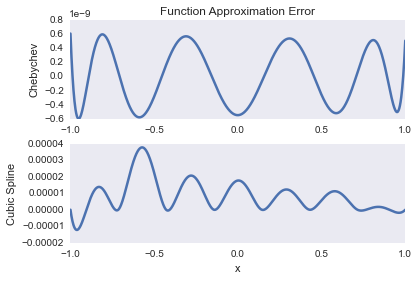

In [8]:
plt.figure()
demo.subplot(2, 1, 1, 'Function Approximation Error', '', 'Chebychev')
plt.plot(x, y - yc[0])

demo.subplot(2, 1, 2, '', 'x', 'Cubic Spline')
plt.plot(x, y - ys[0])

### Plot first derivative approximation error

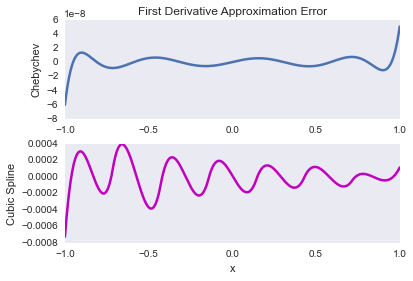

In [9]:
plt.figure()
demo.subplot(2, 1, 1, 'First Derivative Approximation Error', '','Chebychev'),
plt.plot(x, d - dc[0])

demo.subplot(2, 1, 2, '', 'x', 'Cubic Spline')
plt.plot(x, d - ds[0], 'm')

### Plot second derivative approximation error

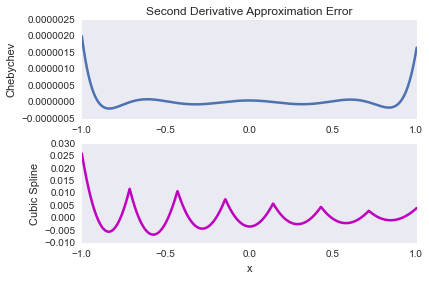

In [10]:
plt.figure()
demo.subplot(2, 1, 1, 'Second Derivative Approximation Error', '', 'Chebychev')
plt.plot(x, s - sc[0])

demo.subplot(2, 1, 2, '', 'x', 'Cubic Spline')
plt.plot(x, s - ss[0], 'm')